## Observations and Insights 

In [188]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset by merging dataframes
mouse_merge_df = pd.merge(mouse_metadata, study_results, on = 'Mouse ID')
# Display the data table for preview using pd 
mouse_merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice using unique
mouse_count = len(mouse_merge_df['Mouse ID'].unique())
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

dup_mouse = mouse_merge_df[mouse_merge_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
print(dup_mouse.loc[:, 'Mouse ID'].unique())

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_df = mouse_merge_df[mouse_merge_df["Mouse ID"] == 'g989']
dup_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# dup_df = mouse_merge_df[mouse_merge_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
clean_data_df = mouse_merge_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)
clean_data_df = clean_data_df[clean_data_df["Mouse ID"] != 'g989']
clean_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
new_mouse_count = len(clean_data_df['Mouse ID'].unique())
new_mouse_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
mean = clean_data_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
median = clean_data_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
variance = clean_data_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
standard_dev = clean_data_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
standard_err = clean_data_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_stats_df = pd.DataFrame({
    'mean': mean, 
    'median': median, 
    'variance': variance, 
    'standard deviation': standard_dev,
    'standard error': standard_err
})
summary_stats_df

,mean,median,variance,standard deviation,standard error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

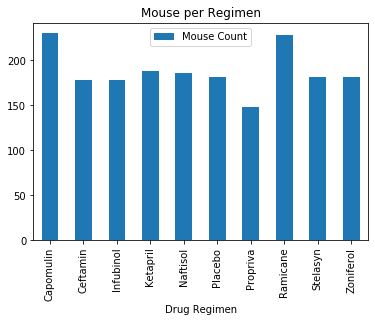

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
summary_chart = clean_data_df.groupby("Drug Regimen").count()

drug_df = pd.DataFrame({'Mouse Count': summary_chart.loc[:, 'Mouse ID']})
drug_df.plot(kind='bar', title = 'Mouse per Regimen')


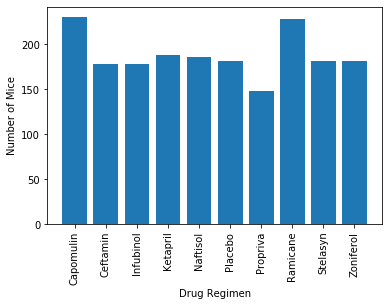

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
fig1, ax1 = plt.subplots()
ax1.bar(x = drug_df.index, height = drug_df['Mouse Count'])
ax1.set_ylabel('Number of Mice')
ax1.set_xlabel('Drug Regimen')
plt.xticks(rotation = 90)
plt.show()

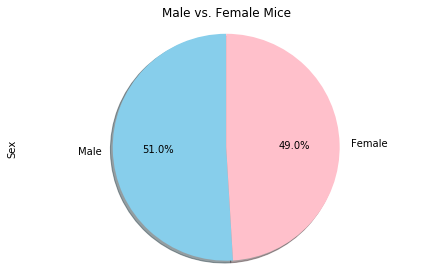

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_groups = clean_data_df['Sex'].value_counts()
gender_groups.plot(kind='pie', title = "Male vs. Female Mice", autopct='%1.1f%%',shadow = True, colors = ['skyblue','pink'], startangle = 90)
plt.tight_layout()
plt.axis('equal')
plt.show()

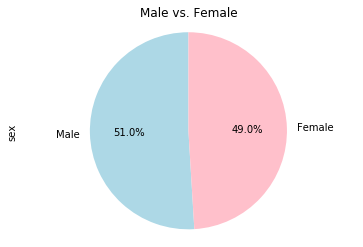

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_groups.values, labels=gender_groups.index, colors = ['lightblue', 'pink'], autopct="%1.1f%%", startangle = 90)
plt.title('Male vs. Female')
plt.axis("equal")
plt.ylabel("sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# # Capomulin, Ramicane, Infubinol, and Ceftamin

# # Start by getting the last (greatest) timepoint for each mouse
timepoint_df = clean_data_df.groupby('Mouse ID')['Timepoint'].max().reset_index() 
timepoint_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_merge = clean_data_df.merge(timepoint_df, on=['Mouse ID', 'Timepoint'])
tumor_merge

#filter out only the drugs we want to see in our dataframe to use as reference for the for loop
filtered_tumor_df = tumor_merge.loc[tumor_merge["Drug Regimen"].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])] 
filtered_tumor_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
234,x822,Ceftamin,Male,3,29,45,61.386660,3
236,y163,Infubinol,Female,17,27,45,67.685569,3
240,y769,Ceftamin,Female,6,27,45,68.594745,4
241,y865,Ceftamin,Male,23,26,45,64.729837,3


In [90]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

for x in treatments:
    stats = filtered_tumor_df.loc[filtered_tumor_df["Drug Regimen"] == x]['Tumor Volume (mm3)']
    quartiles = stats.quantile([.25, .50, .75,])
    lowerq = quartiles[0.25]
    higherq = quartiles[0.75]
    iqr = higherq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = higherq  + (1.5 * iqr)

    print(f"{x} IQR data is:")
    print(f'Lower Quartile of tumor volume: {lowerq}')
    print(f'Upper Quartile of tumor volume: {higherq}')

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    print(f'Inner Quartile Range is: {iqr}')
    print(f'The Median of tumor volume is {quartiles[0.5]}')

    # Determine outliers using upper and lower bounds
    print(f'Values below {lower_bound} could be outliers, and values above {upper_bound} could also be outliers!')
    
    # Locate the rows which contain mice on each drug and get the tumor volumes (completed in previous cell).
    # add subset (added in previous cell to use as reference for the for loop).
   
   
 
for x in treatments:
    tumor_volume_data.append(filtered_tumor_df.loc[filtered_tumor_df["Drug Regimen"] == x]['Tumor Volume (mm3)'])

Capomulin IQR data is:
Lower Quartile of tumor volume: 32.37735684
Upper Quartile of tumor volume: 40.1592203
Inner Quartile Range is: 7.781863460000004
The Median of tumor volume is 38.125164399999996
Values below 20.70456164999999 could be outliers, and values above 51.83201549 could also be outliers!
Ramicane IQR data is:
Lower Quartile of tumor volume: 31.56046955
Upper Quartile of tumor volume: 40.65900627
Inner Quartile Range is: 9.098536719999998
The Median of tumor volume is 36.56165229
Values below 17.912664470000003 could be outliers, and values above 54.30681135 could also be outliers!
Infubinol IQR data is:
Lower Quartile of tumor volume: 54.04860769
Upper Quartile of tumor volume: 65.52574285
Inner Quartile Range is: 11.477135160000003
The Median of tumor volume is 60.16518046
Values below 36.83290494999999 could be outliers, and values above 82.74144559000001 could also be outliers!
Ceftamin IQR data is:
Lower Quartile of tumor volume: 48.72207785
Upper Quartile of tumor 

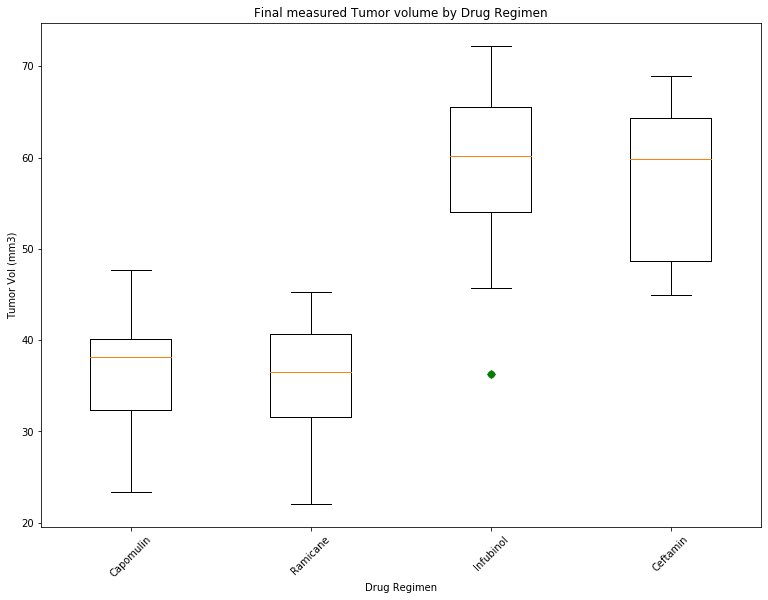

In [103]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

stats = filtered_tumor_df.loc[filtered_tumor_df["Drug Regimen"] == x]['Tumor Volume (mm3)']
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

Capomulin = filtered_tumor_df.loc[filtered_tumor_df["Drug Regimen"] == 'Capomulin']['Tumor Volume (mm3)']
Ramicane = filtered_tumor_df.loc[filtered_tumor_df["Drug Regimen"] == 'Ramicane']['Tumor Volume (mm3)']
Infubinol = filtered_tumor_df.loc[filtered_tumor_df["Drug Regimen"] == 'Infubinol']['Tumor Volume (mm3)']
Ceftamin = filtered_tumor_df.loc[filtered_tumor_df["Drug Regimen"] == 'Ceftamin']['Tumor Volume (mm3)']

data = [Capomulin, Ramicane, Infubinol, Ceftamin]
fig = plt.figure(figsize =(10, 7)) 
ax = fig.add_axes([0, 0, 1, 1]) 
bp = ax.boxplot(data) 
ax.set_title('Final measured Tumor volume by Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Vol (mm3)')
ax.boxplot(tumor_volume_data,notch=0,sym='gD')

plt.xticks([1,2,3,4],treatments)
plt.xticks(rotation=45)

# show plot 
plt.show()


## Line and Scatter Plots

In [127]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_mouse = clean_data_df.loc[clean_data_df["Drug Regimen"] == 'Capomulin']
# capomulin_mouse.head()

mouse_id = clean_data_df[clean_data_df["Mouse ID"] == 's185']
mouse_id

line_data = mouse_id.loc[:, ['Timepoint', 'Tumor Volume (mm3)']]
line_data

,Timepoint,Tumor Volume (mm3)
10,0,45.000000
11,5,43.878496
12,10,37.614948
13,15,38.177232
14,20,36.866876
15,25,33.949940
16,30,32.959671
17,35,28.328531
18,40,25.472143
19,45,23.343598


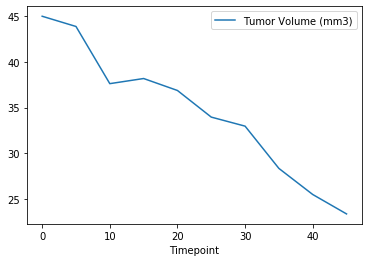

In [128]:
#created line graph using mouse s185
line_data = line_data.plot(x ='Timepoint', y='Tumor Volume (mm3)', kind = 'line')
plt.show()

In [170]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_mouse = clean_data_df.loc[clean_data_df["Drug Regimen"] == 'Capomulin']
# capomulin_mouse
average_tumor_df = capomulin_mouse.groupby(['Mouse ID']).mean()['Tumor Volume (mm3)']
average_tumor_df
weight_data = capomulin_mouse.loc[:, ['Mouse ID', "Weight (g)"]]
weight_data = weight_data.drop_duplicates()
weight_data
scatter_data = pd.merge(average_tumor_df, weight_data, on = 'Mouse ID')
scatter_data.head()

,Mouse ID,Tumor Volume (mm3),Weight (g)
0,b128,41.963636,22
1,b742,40.083699,21
2,f966,36.505973,17
3,g288,41.990097,19
4,g316,44.613344,22


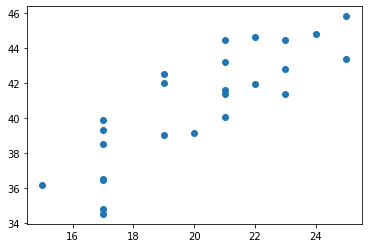

In [174]:
#created scatter plot using mouse s185
weight = scatter_data.iloc[:,2]
tumor_volume = scatter_data.iloc[:,1]
correlation = st.pearsonr(weight,tumor_volume)
plt.scatter(weight,tumor_volume)
plt.show()

## Correlation and Regression

The correlation between both factors is 0.84


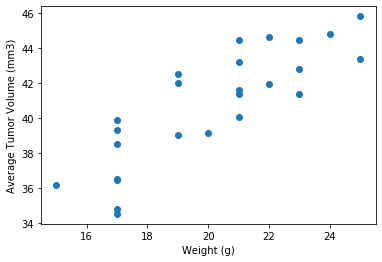

In [181]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# The next example will compute the Pearson correlation coefficient between "Income per Capita" and "Average Alcohol Consumed"

x_values = scatter_data.iloc[:,2]
y_values = scatter_data.iloc[:,1]
correlation = st.pearsonr(weight,tumor_volume)
plt.scatter(weight,tumor_volume)
plt.xlabel("Weight (g)")
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The correlation between both factors is {round(correlation[0],2)}")


The r-squared is: 0.8419363424694718
The equation of the regression line is: y = 0.95x + 21.55


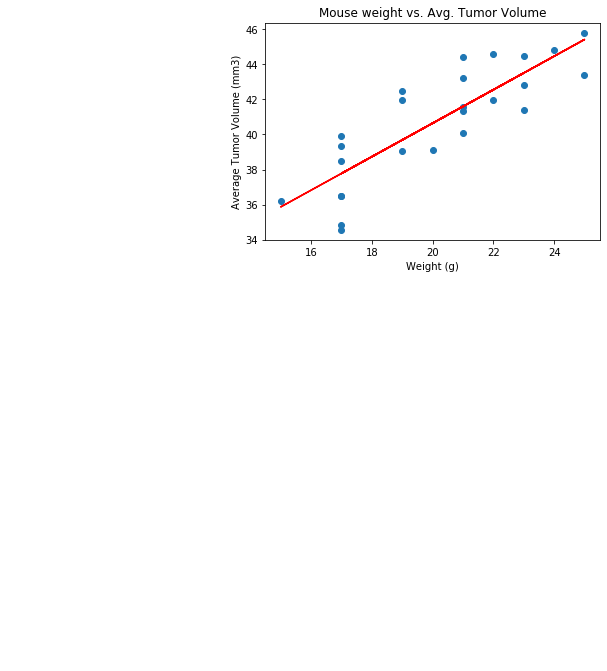

In [193]:
## add a linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

## taking the equation from the line above, and calculating the points along the line
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize = 15, color="red")
plt.title("Mouse weight vs. Avg. Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")
plt.show()